# **Project 2: Iris Flower Classification**

![alt text](structure-of-a-flower.webp)

by TSR

### **Data Import**

In [3]:
#!/bin/bash
!kaggle datasets download arshid/iris-flower-dataset

Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/0.99k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 0.99k/0.99k [00:00<00:00, 2.37MB/s]


In [1]:
!unzip iris-flower-dataset.zip

Archive:  iris-flower-dataset.zip
  inflating: IRIS.csv                


### **Data Manipulation**

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [333]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [334]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [336]:
df.shape

(150, 5)

In [337]:
df.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [338]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor


In [339]:
df1 = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']]

In [340]:
df1['species'] = df1['species'].replace({'Iris-setosa':2, 'Iris-versicolor':3, 'Iris-virginica':1})

In [341]:
df1.species.unique()

array([2, 3, 1])

In [342]:
for col in df1:
    print(f"{col}: {df1[col].unique()}")

sepal_length: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal_width: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal_length: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal_width: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
species: [2 3 1]


In [344]:
x = df1.drop(['species'], axis=1)
y = df1['species']

In [345]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [346]:
print('x_Train size:', x_train.shape[0])
print('y_Train size:', y_train.shape[0])

print('x_Test size:', x_test.shape[0])
print('y_Test size:', x_test.shape[0])

x_Train size: 120
y_Train size: 120
x_Test size: 30
y_Test size: 30


In [368]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [369]:
print(f"Accuracy Score: {lr.score(x_test, y_test)*100:.2f}%")

Accuracy Score: 100.00%


In [370]:
y_test[:5]

73     3
18     2
118    1
78     3
76     3
Name: species, dtype: int64

In [371]:
y_known = []

for i in y_test:
    if i==1:
        y_known.append("Virginia")
    elif i==2:
        y_known.append("Setosa")
    else:
        y_known.append("Versicolor")

y_known[:5]

['Versicolor', 'Setosa', 'Virginia', 'Versicolor', 'Versicolor']

In [372]:
lr_predict = lr.predict(x_test)
lr_predict[:5]

array([3, 2, 1, 3, 3])

In [376]:
y_pred = []

for i in lr_predict:
    if i==1:
        y_known.append("Virginia")
    elif i==2:
        y_known.append("Setosa")
    else:
        y_known.append("Versicolor")

y_known[:5]

['Versicolor', 'Setosa', 'Virginia', 'Versicolor', 'Versicolor']

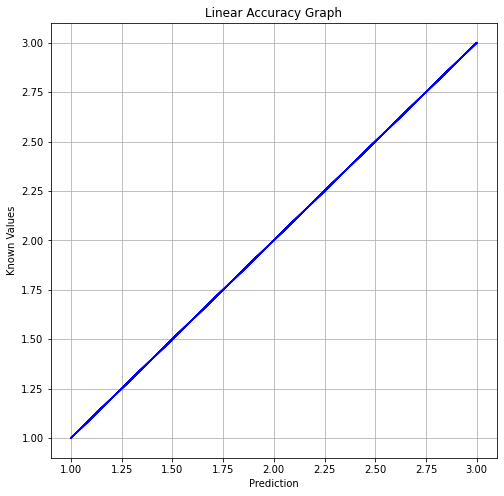

In [393]:
plt.figure(figsize=(8,8))
plt.plot(lr_predict, y_test, 'b')
plt.title("Linear Accuracy Graph")
plt.xlabel("Prediction")
plt.ylabel("Known Values")
plt.grid()
plt.show()